<a href="https://colab.research.google.com/github/ann-macharia/TITANIC-SURVIVAL-PREDICTION-/blob/master/9_TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEFINING THE SOLUTION

### a) Specifying the Question

 Create a  KNN model that is ble to predict whether a passenger on the titanic died or survived.

### b) Defining the Metric for Success

The metric for success in this project will be a well fitted and fairly accurate KNN classifier that will optimumly predict if a passenger on the titanic died or survived.

### c) Understanding the context 

The titanic was one of the major developments in the transport industry. It was a big ship that was built in the early 90's for passenger and cargo transportation. 

The maiden voyage for the titanic was on April 10th, 1912 where it set out from a Southampton port. It headed to france to pick more passengers and cargo a ports Quuenbourg and Cherbourgh.

Sadly, On April 15th, 1917, the titanic was not able to reach its destination Newyork as it hit an iceberg. The collision caused water to start leaking and the ship started sinking. There were efforts to try and save the passengers, but unfortunately not all passengers survived.

A predictive model will be created to determine whether a passenger survived or not given features of the passengers. These features include: Gender, Class etc.

### d) Recording the Experimental Design

The main aim of the project is to create a predictive model for predict whether a passenger on the titanic died or survived.Data cleaning and exploratory data analysis will be done before creating the model and evaluation of the model and a final documentation of the project.

### e) Data Relevance

The data to be used is a record of all passengers who were on the ship.
It contains the names of passengers, the gender, number of sibling and parents the passengers had, port on which they embarked the ship and many other relevant details which will help create a optimal predictive model.

# PART 1

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. The features include patients' biodata, physical characteristics, past history of the patients etc. All the variables are relevant to predict whether a patient has hypothyroidism or not

# READING THE DATA

In [0]:
#Importing libraries.

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [0]:
a = pd.read_csv('/content/train (1).csv')


# CHECKING THE DATA

In [161]:
# Determining the no. of records in our dataset
#
print(a.shape)

(891, 12)


In [162]:
# Previewing the top of our dataset
#
a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
# Previewing the bottom of our dataset
# 
a.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [164]:
# Checking whether each column has an appropriate datatype
#
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Passenger id should be an object, survived should be a category, p-class should be a category.

In [0]:
#Fixing the data types                  
a['Survived'] = pd.Categorical(a['Survived'])
a['PassengerId'] = a['PassengerId'].astype(object)
a['Pclass'] = pd.Categorical(a['Pclass'])

In [166]:
#Checking if there are any null values
#
a.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The embarked column has very many missing values more than 2/3rds of the data. This column will be dropped.

The ages column also has some missing values. These will be imputed.

In [0]:
#Dropping the column Cabin
#
a.drop('Cabin', axis = 1, inplace = True)

In [168]:
#Imputing missing values. 
#The names of the passengers have titles and we can use those titles to impute the age of the passengers.
# The function below extracts the title in the column Names.
#
def get_title(name):
  if '.' in name:
    return name.split(',')[1].split('.')[0].strip()
  else:
    return 'unknown'

# The function is appliied to the names column.
# An alphabetically ordered list is created with all the unique titles.
#
titles = sorted(set([i for i in a.Name.map(lambda x: get_title(x))]))
print('Different titles found on the data set:')
print(len(titles), ':', titles)

#There are seventeen unique titles.

Different titles found on the data set:
17 : ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']


In [0]:
#Since the titles are many, the function below normalises the titles into 4 commom titles
# 
def replace_title(x):
  title = x['Title']
  if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
    return 'Mr'
  elif title in ['the Countess','Mme', 'Lady']:
    return 'Mrs'
  elif title in ['Mlle', 'Ms']:
    return 'Miss'
  elif title =='Dr':
    if x['Sex'] == 'male':
      return 'Mr'
    else:
      return 'Mrs'
  else:
    return title

In [170]:
# The 1stfunction is mapped onto the column names, The 2nd column is applied to the dataframe a
# 
a['Title'] = a['Name'].map(lambda x : get_title(x))
print (a['Title'].unique())
a['Title'] = a.apply(replace_title, axis = 1)
print(a['Title'].unique())

# Our titles now have only 4 titles.

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master']


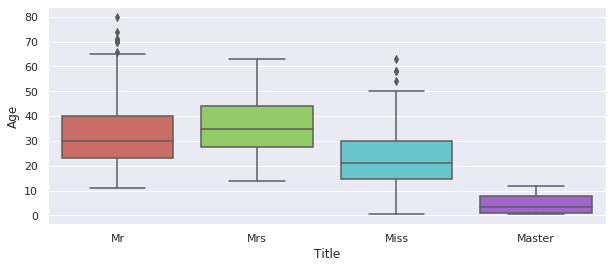

In [171]:
#Imputing missing values using titles.

# we check the relatonship between age and name title using a boxplot
#
sns.boxplot(x='Title', y='Age', data=a, palette='hls')

Average age of a Mr is  28.

Average age of a Mrs is 35.

Average of a Miss is 24.

Average age of a master is 5

In [0]:
# Creating a function that assigns missing ages depending on class.
def age_approx(cols):
    Age = cols[0]
    Title = cols[1]
    
    if pd.isnull(Age):
        if Title  == 'Mr':
            return 28
        elif Title == 'Mrs':
            return 35
        elif Title == 'Miss':
            return 24
        else:
            return 5
    else:
        return Age

In [0]:
#Creating the age column.
#
a['Age'] = a[['Age', 'Title']].apply(age_approx, axis=1)

In [0]:
# There are 2 null values remaining in the embarked column, i will drop them
#
a = a.dropna()

# The names column can be dropped. All the useful information has been extracted.
a.drop('Name', axis = 1, inplace = True)

In [175]:
# Checking for any null values
a.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

Data is clean and has no null values.

In [176]:
#Checking for duplicates.
a.duplicated().any()

False

We have no duplicated values.

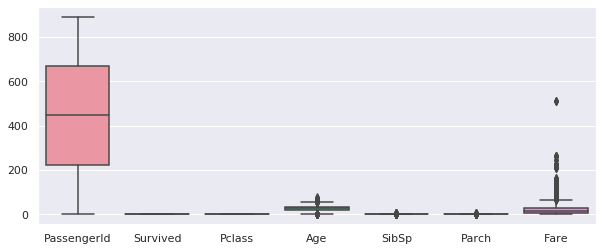

In [177]:
#Checking for outliers in the data.
sns.boxplot(data = a)

#Fair has many outliers.

In [178]:
#Dropping the outliers in fair.
Q3=a['Fare'].quantile(0.75)
Q1=a['Fare'].quantile(0.25)
IQR = Q3 - Q1

a = a[~((a['Fare'] < (Q1 - 1.5 * IQR)) |(a['Fare'] > (Q3 + 1.5 * IQR)))]
a.shape


(775, 11)

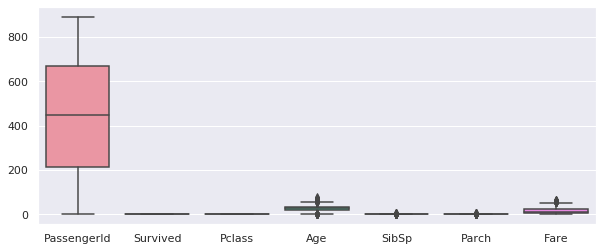

In [179]:
#Checking if outliers have been dropped.

sns.boxplot(data = a)

#All outliers dropped

In [180]:
# Preview of cleaned data
#
a.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr
5,6,0,3,male,28.0,0,0,330877,8.4583,Q,Mr


# EXPLORATORY DATA ANALYSIS

## Univariate Analysis

In [181]:
#data previewing.
a.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr
5,6,0,3,male,28.0,0,0,330877,8.4583,Q,Mr


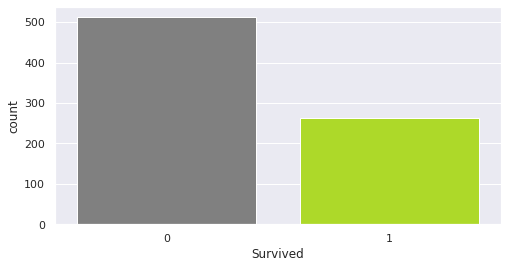

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 4)})
sns.set(style="darkgrid")

colors = ["#808080", "#BCF60C"]
sns.set_palette(sns.color_palette(colors))
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x=a['Survived'], alpha=1)

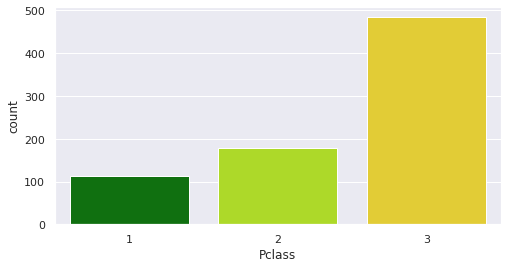

In [183]:
# Passengers distribution across the classes.
#
colors = ["#008000", "#BCF60C", "#FFE119"]
sns.set_palette(sns.color_palette(colors))
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x=a['Pclass'], alpha=1)

Most passengers were in 3rd class, folllowed by the passengers in 1st class and in last place 2nd class.
The classes were determined by th ticket price.

Passengers in 3rd class were many since the tickets price were lower. Many passengers consisted primarily of emigrants moving to the United States and Canada.

Those travelling in first class, most of them the wealthiest passengers on board. Many wealthy people did not want to miss out on the maiden voyage thus the high number of passengers compared to 2nd class

Second-class passengers were predominantly middle-class travellers and included professors, authors, clergymen, and tourists. 

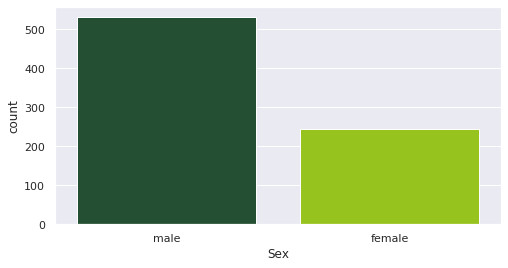

In [184]:
sns.set(style="darkgrid")
colors = ["#1E5631", "#A4DE02"]
sns.set_palette(sns.color_palette(colors))
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x=a['Sex'], alpha=1)

There were more males on the titanic compared to females

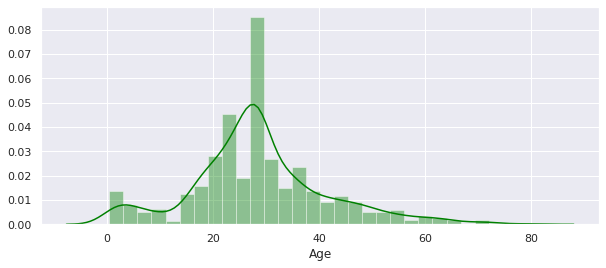

In [185]:
#Age distribution.
#
import seaborn as sns
sns.distplot( a['Age'], bins = 30, color = '#008000')

The age is normally distributed. Most people were betwen 20 ang 40 years.

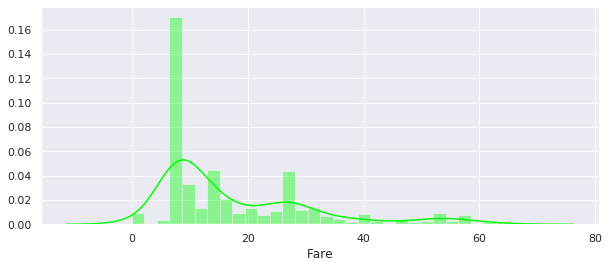

In [186]:
#Age distribution.
#
import seaborn as sns
sns.distplot( a['Fare'], bins = 30, color = '#00FF00')

Many passengers paid low fares for the tickests. This further emphasizes that most passengers were in third class.

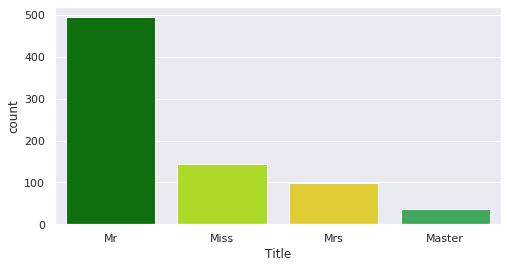

In [187]:
# Passengers distribution across the classes.
#
colors = ["#008000", "#BCF60C", "#FFE119", '#2EBB57']
sns.set_palette(sns.color_palette(colors))
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x=a['Title'], alpha=1)

There were more younger ladies, and more older men

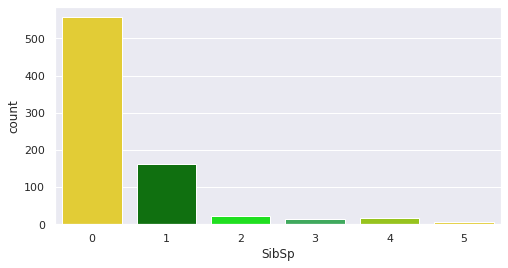

In [188]:
sns.set(style="darkgrid")
colors = [ "#FFE119", "#008000", '#00FF00', '#2EBB57', "#A4DE02", "#FFE119", "#BCF60C", "#FFE119"]
sns.set_palette(sns.color_palette(colors))
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x=a['SibSp'], alpha=1)

Most passengers travelled without the company of siblings and/or a spouse

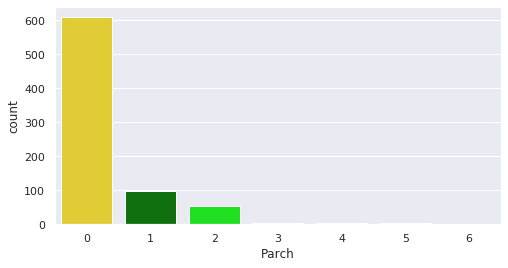

In [189]:
sns.set(style="darkgrid")
colors = [ "#FFE119", "#008000", '#00FF00', '#2EBB57', "#A4DE02", "#FFE119", "#BCF60C", "#FFE119"]
sns.set_palette(sns.color_palette(colors))
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x=a['Parch'], alpha=1)

Most passengers travelled without the company of parents and/or a children


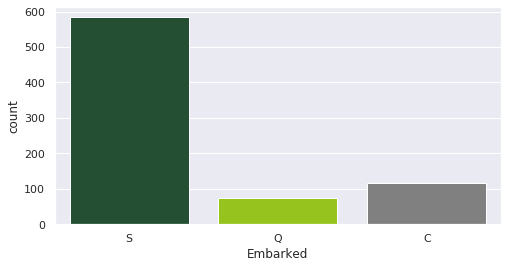

In [190]:
sns.set(style="darkgrid")
colors = ["#1E5631", "#A4DE02","#808080" ]
sns.set_palette(sns.color_palette(colors))
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x=a['Embarked'], alpha=1)

Most passengers embarked the ship from the Southampton port England. Q is Queenstown and C is cherbourg. Queenstown and Cherbourg were ports in France where the titanic made a stop to pick more passengers.

## Bivariate Analysis

In [191]:
#previewing data
a.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr
5,6,0,3,male,28.0,0,0,330877,8.4583,Q,Mr


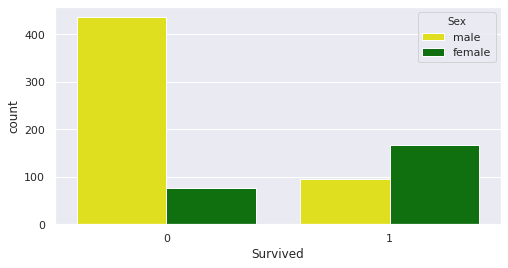

In [192]:
#Distribution os the hypothyroid disease in both genders.
#
sns.set(style="darkgrid")
colors = ["#FFFF00", "#008000"]
sns.set_palette(sns.color_palette(colors))
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x=a['Survived'], hue=a['Sex'], alpha=1)

This is a graph showing the Survival distribution in both the males and the females. For the passengers who died, males were more, for those who survived females were also more.

Sex     Survived
female  0            76
        1           168
male    0           436
        1            95
Name: Survived, dtype: int64


([<matplotlib.patches.Wedge at 0x7f38c1840dd8>,
 [Text(-0.800954994961995, -0.753970222253791, 'Survived'),
  Text(0.87376900840386, 0.8225130515395701, 'died')],
 [Text(-0.43688454270654264, -0.4112564848657041, '74.0%'),
  Text(0.5096985882355849, 0.47979928006474915, '26.0%')])

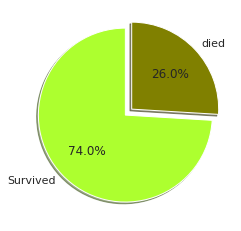

In [193]:
#Checking survival rates in both females and males.
# 
w=a.groupby (['Sex','Survived'])['Survived'].count()
print(w)

# Pie chart for women distribution of survival.
colors = ["#ADFF2F", "#808000"]
sns.set_palette(sns.color_palette(colors))
labels = ['Survived', 'died']
sizes = [231, 81]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

Out of all females tested, 6.8% tested positive  

([<matplotlib.patches.Wedge at 0x7f38c1808f60>,
 [Text(-0.6151673599704987, 0.9119041173428966, 'survived'),
  Text(0.671091618852202, -0.9948045230628633, 'died')],
 [Text(-0.33554583271118105, 0.4974022458233981, '18.9%'),
  Text(0.3914701109971178, -0.580302638453337, '81.1%')])

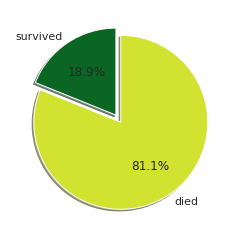

In [194]:
# Pie chart for men distribution of survival
colors = ["#0B6623", "#D1E231"]
sns.set_palette(sns.color_palette(colors))
labels = ['survived', 'died']
sizes = [109, 468]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

Out of all males tested, 4.7% tested positive.

Though the women are more than men, it is interesting to note the more women are affected by the disease compared to men.

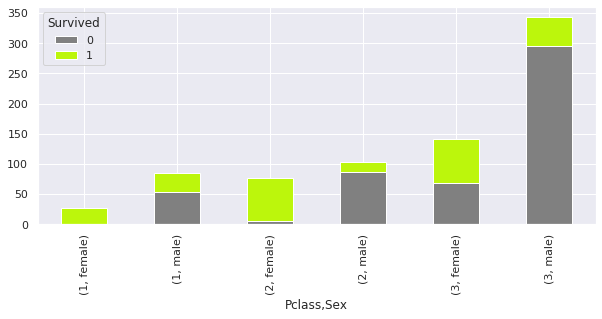

In [195]:
colors = ["#808080", "#BCF60C"]
sns.set_palette(sns.color_palette(colors))
d = a.groupby(['Pclass', 'Survived', 'Sex'])['Survived'].count().unstack('Survived').fillna(0)
d
d.plot(kind='bar', stacked=True, )

1st Class:

No females died in the first class
More males in 1st class died compared to females

2nd Class:

Almost all females survived in second class
Almost all males died in second class

3rd Class:

Almost 50% females survived
More than 80% males died in third class

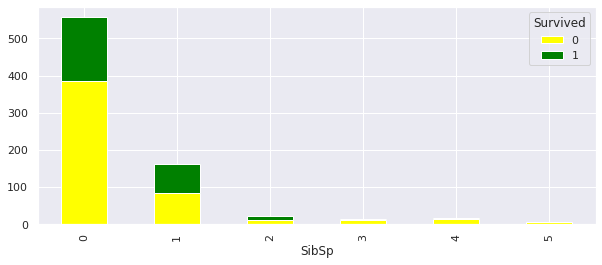

In [201]:
colors = ["#FFFF00", "#008000"]
sns.set_palette(sns.color_palette(colors))
d = a.groupby(['Survived', 'SibSp'])['SibSp'].count().unstack('Survived').fillna(0)
d
d.plot(kind='bar', stacked=True, )

The fewer the siblings and spouse the higher the chance of survival

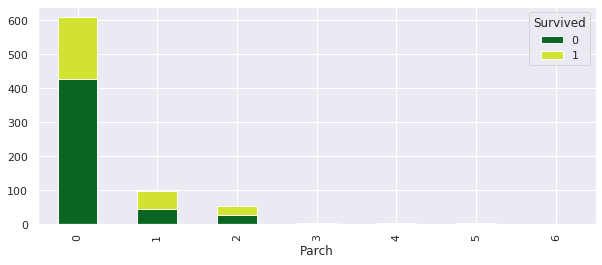

In [199]:
colors = ["#0B6623", "#D1E231"]
sns.set_palette(sns.color_palette(colors))
d = a.groupby(['Survived', 'Parch'])['Parch'].count().unstack('Survived').fillna(0)
d
d.plot(kind='bar', stacked=True, )

The fewer the Parents and children a passenger had, the higher the chance of survival

## Multivariate Analysis

This is a classification problem, LDA will be used to decide feature importance.

In [202]:
# Separating features and labels.
# We drop the variables that are not important in the model
X = a.drop(['PassengerId', 'Ticket', 'Survived'], axis=1)
y = a["Survived"]
X
# Some columns are strings. Encoding is needed.

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr
5,3,male,28.0,0,0,8.4583,Q,Mr
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,Mr
887,1,female,19.0,0,0,30.0000,S,Miss
888,3,female,24.0,1,2,23.4500,S,Miss
889,1,male,26.0,0,0,30.0000,C,Mr


In [203]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'.
p = ['Sex', 'Embarked', 'Title'] 
for i in p:
  X[i] = label_encoder.fit_transform(X[i]) 
 
X 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,22.0,1,0,7.2500,2,2
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,2,2
5,3,1,28.0,0,0,8.4583,1,2
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2,2
887,1,0,19.0,0,0,30.0000,2,1
888,3,0,24.0,1,2,23.4500,2,1
889,1,1,26.0,0,0,30.0000,0,2


In [0]:
# The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [205]:
#Checking how many rows our train set has.
#We have 8 columns.
X_train.shape

(620, 8)

In [0]:
# Applying the LDA transformation.
# To use a specified number of components we can specify
#
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [207]:
#Checking the number of rows after LDA transformation
#
X_train.shape

(620, 1)

LDA has reduced data to a one dimension

# IMPLEMENTING THE SOLUTION

## 1) "Creating KNN model"

In [208]:
# Separating features and labels.
# We drop the variables that are not important in the model
X = a.drop(['PassengerId', 'Ticket', 'Survived'], axis=1)
y = a["Survived"]
X
# Some columns are strings. Encoding is needed.

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr
5,3,male,28.0,0,0,8.4583,Q,Mr
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,Mr
887,1,female,19.0,0,0,30.0000,S,Miss
888,3,female,24.0,1,2,23.4500,S,Miss
889,1,male,26.0,0,0,30.0000,C,Mr


In [209]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'.
p = ['Sex', 'Embarked', 'Title'] 
for i in p:
  X[i] = label_encoder.fit_transform(X[i]) 
 
X 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,22.0,1,0,7.2500,2,2
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,2,2
5,3,1,28.0,0,0,8.4583,1,2
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2,2
887,1,0,19.0,0,0,30.0000,2,1
888,3,0,24.0,1,2,23.4500,2,1
889,1,1,26.0,0,0,30.0000,0,2


In [0]:
#Separating training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [211]:
# Training model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [212]:
#Prediction.
y_pred = classifier.predict(X_test)
w = pd.DataFrame({'actual' : y_test, 'predicted' : y_pred})
w

,actual,predicted
732,0,0
543,1,1
442,0,0
115,0,0
740,1,0
...,...,...
107,1,0
439,0,1
819,0,0
818,0,0


In [213]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[127  21]
 [ 45  40]]
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       148
           1       0.66      0.47      0.55        85

    accuracy                           0.72       233
   macro avg       0.70      0.66      0.67       233
weighted avg       0.71      0.72      0.70       233



Model has an f1 score of 0.79

# Hyperparameter tuning the KNN Model

In [52]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = { 'n_neighbors' : range(1,20),
          'metric' : ['euclidean', 'manhattan', 'minkowski'],
          'weights': ['uniform', 'distance']}
classifier = KNeighborsClassifier( )
clf= GridSearchCV(classifier,param_grid,cv=5)

clf.fit(X,y)

print("Best Score:" + str(clf.best_score_))
print("Best Parameters: " + str(clf.best_params_))

Best Score:0.7587096774193548
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [214]:
# Fitting the model with the new parameters.
# Training model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='manhattan')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [215]:
#Prediction.
y_pred_tuned = classifier.predict(X_test)
w1 = pd.DataFrame({'actual' : y_test, 'predicted' : y_pred_tuned})
w1

,actual,predicted
732,0,0
543,1,0
442,0,0
115,0,0
740,1,0
...,...,...
107,1,0
439,0,0
819,0,0
818,0,0


In [216]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

[[129  19]
 [ 35  50]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       148
           1       0.72      0.59      0.65        85

    accuracy                           0.77       233
   macro avg       0.76      0.73      0.74       233
weighted avg       0.76      0.77      0.76       233



Model has a higher f1-score of 0.83 after hyperparameter tuning

# Conclusion on the K-NN models

The KNN classification model had an f1-score of 0.79. After hyperparametre tuning, the F1_score improved to 0.83. 

# PART 2

# READING THE DATA

In [0]:
#Loading the dataset.
#
df = pd.read_csv('/content/spambase.data', header = None)

# CHECKING THE DATA

In [119]:
#Sampling 10 rows of data.
#
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
4087,0.49,0.00,0.49,0.0,0.49,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.49,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.99,0.49,0.00,0.0,0.000,0.000,0.000,0.091,0.000,0.000,1.214,5,51,0
573,0.50,0.00,0.75,0.0,0.25,0.25,0.25,0.50,0.00,0.00,0.50,2.26,0.00,0.00,0.00,0.50,1.00,0.25,4.03,0.00,2.01,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.034,0.000,0.375,0.034,0.000,4.200,60,231,1
1334,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,3.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.0,0.00,1.88,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.264,0.000,0.000,0.000,0.000,0.000,4.333,13,78,1
2775,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.00,0.84,0.00,1.68,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.84,0.0,0.84,0.00,0.0,0.0,0.84,0.00,0.84,0.84,0.00,0.0,0.000,0.000,0.137,0.413,0.000,0.137,3.052,13,116,0
376,0.35,0.46,0.31,0.0,0.15,0.03,0.00,0.35,0.58,0.66,0.31,0.70,0.62,1.28,0.03,0.23,0.42,0.00,3.12,0.00,1.36,0.0,0.46,0.46,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.03,0.00,0.00,0.0,0.005,0.088,0.000,0.319,0.479,0.124,6.110,116,2218,1
2172,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.74,0.00,0.00,0.00,0.00,0.00,0.74,1.49,0.00,0.00,0.0,0.00,0.00,4.47,2.23,0.00,0.74,0.0,0.74,0.74,0.0,0.00,0.0,0.74,0.74,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.102,0.204,0.102,0.000,0.204,2.121,10,87,0
1568,0.50,0.19,0.57,0.0,0.25,0.38,0.00,0.00,0.50,0.06,0.12,0.63,0.19,0.00,0.00,0.69,0.50,0.38,3.49,0.06,1.27,0.0,0.31,1.08,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.25,0.00,0.06,0.0,0.000,0.067,0.000,0.435,0.592,0.022,5.335,73,1590,1
744,0.00,0.00,0.67,0.0,0.27,0.27,0.13,0.00,0.13,0.27,0.00,0.40,0.40,0.00,0.00,0.00,0.27,0.00,0.00,0.00,0.00,0.0,0.27,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.109,0.000,0.021,0.000,0.000,1.728,12,204,1
1673,0.13,0.10,0.55,0.0,0.02,0.13,0.02,1.11,0.23,0.29,0.05,0.34,0.42,0.07,0.55,0.87,0.45,0.66,3.95,0.05,1.59,0.0,0.39,0.34,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.02,0.0,0.00,0.00,0.00,0.0,0.00,0.31,0.0,0.0,0.00,0.05,0.23,0.02,0.00,0.0,0.030,0.083,0.000,0.538,0.145,0.070,5.108,116,3525,1
2602,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.81,0.00,0.0,0.00,0.00,0.0,3.63,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,1.81,0.00,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.181,3,13,0


In [120]:
# Checking shape of the datframe.
df.shape

(4601, 58)

In [121]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
0     4601 non-null float64
1     4601 non-null float64
2     4601 non-null float64
3     4601 non-null float64
4     4601 non-null float64
5     4601 non-null float64
6     4601 non-null float64
7     4601 non-null float64
8     4601 non-null float64
9     4601 non-null float64
10    4601 non-null float64
11    4601 non-null float64
12    4601 non-null float64
13    4601 non-null float64
14    4601 non-null float64
15    4601 non-null float64
16    4601 non-null float64
17    4601 non-null float64
18    4601 non-null float64
19    4601 non-null float64
20    4601 non-null float64
21    4601 non-null float64
22    4601 non-null float64
23    4601 non-null float64
24    4601 non-null float64
25    4601 non-null float64
26    4601 non-null float64
27    4601 non-null float64
28    4601 non-null float64
29    4601 non-null float64
30    4601 non-null float64
31    4601 non-null float

Our data has no column heads. All other columns have floats, except column 57 which has 1's and 0's. 

This row is unique and i will use it as the target variable. I will convert it to a categorrical variable.

In [0]:
# Converting the last should be to a categorical varible.
# For the purposes of bivariate analysis, we will nfirst not convert it to categorical till after the analysis.
#
# df.loc[:,57]  = pd.Categorical(df.loc[:,57])
# df.info()

In [123]:
# Checicking if there are any null values.
df.isnull().any()

# There are no null values.

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
dtype: bool

In [124]:
#Checking for duplicates.
#
# df.duplicated().any()

# Our data  has duplicates.
df.duplicated().sum()

# We have 391 duplicates

391

In [0]:
# Dropping the duplicates.
df = df.drop_duplicates(keep = 'first')

In [126]:
# Checking the new shape of the dataframe
df.shape

(4210, 58)

# EXPLORATORY DATA ANALYSIS

## Univariate analysis

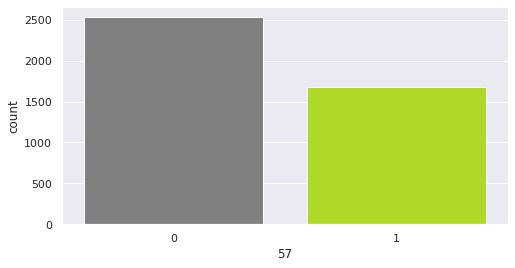

In [127]:
# Countplot of the dependent variable.
colors = ["#808080", "#BCF60C"]
sns.set_palette(sns.color_palette(colors))
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x=df.loc[:,57], alpha=1)

There are more zeros than ones but the difference is not big enough for this data to be considered imbalanced.

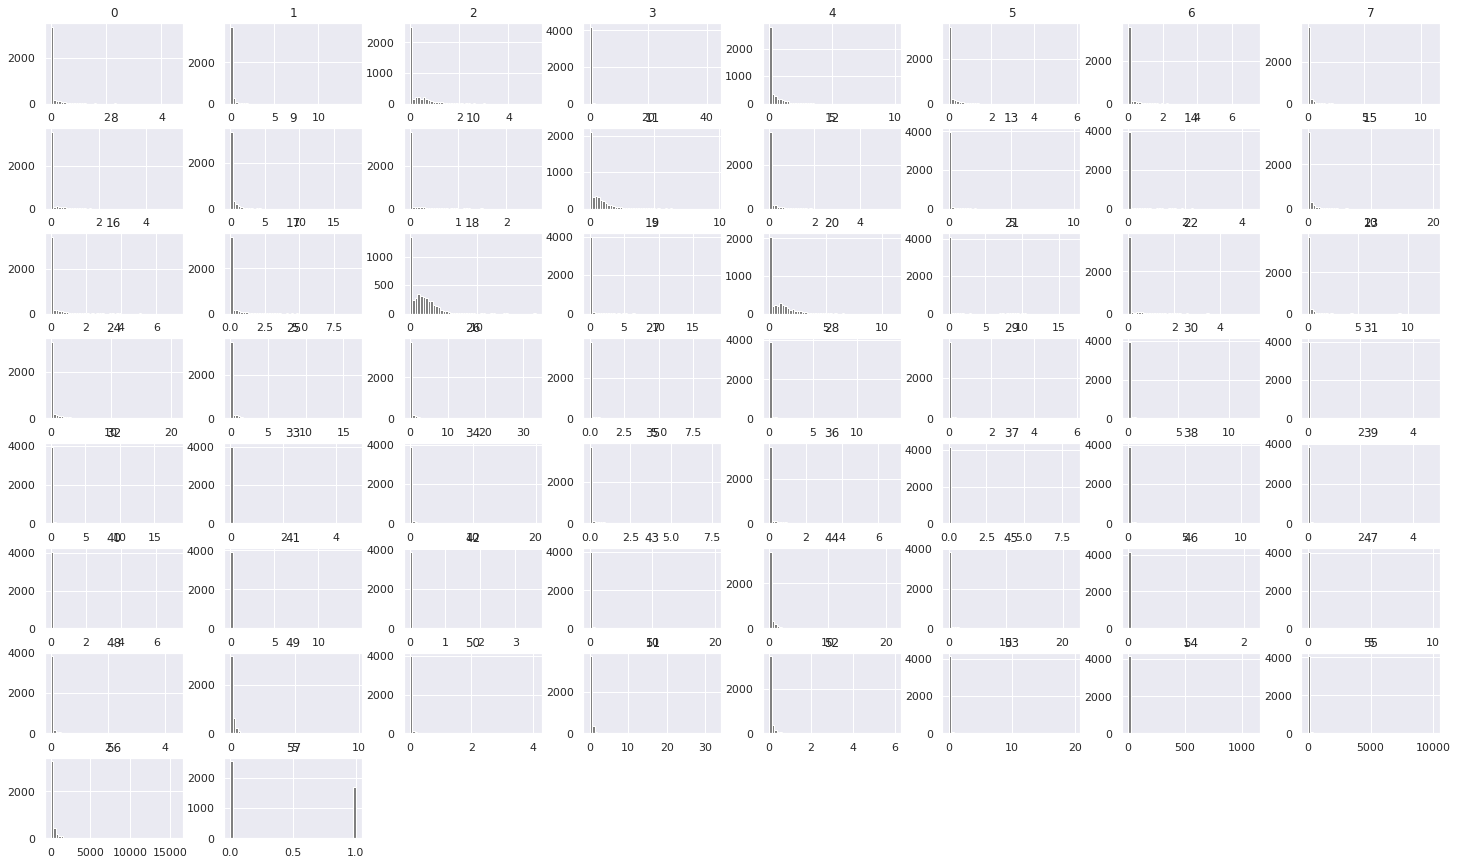

In [128]:
#Distribution plot
df.hist(bins=50,figsize=(25,15))
plt.show()

Most of the variables have a chisquare distribution

## Bivariate distribution.

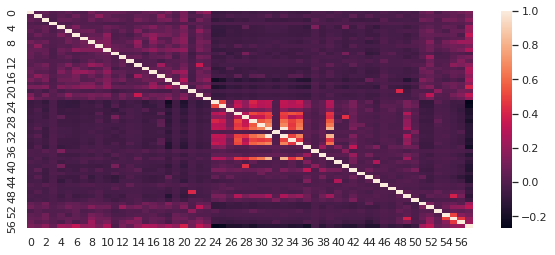

In [131]:
# A heatmap to show gow the features are correlated
#
sns.heatmap(df.corr())

It is clear from the heatmap above that most of the variables are not correlated

## Multivariate analysis.

# IMPLEMENTING SOLUTION

This is a classification problem, LDA will be used to decide feature importance.

In [132]:
# The last column needs to be converted to a categorical column.
df.loc[:,57]  = pd.Categorical(df.loc[:,57])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4210 entries, 0 to 4600
Data columns (total 58 columns):
0     4210 non-null float64
1     4210 non-null float64
2     4210 non-null float64
3     4210 non-null float64
4     4210 non-null float64
5     4210 non-null float64
6     4210 non-null float64
7     4210 non-null float64
8     4210 non-null float64
9     4210 non-null float64
10    4210 non-null float64
11    4210 non-null float64
12    4210 non-null float64
13    4210 non-null float64
14    4210 non-null float64
15    4210 non-null float64
16    4210 non-null float64
17    4210 non-null float64
18    4210 non-null float64
19    4210 non-null float64
20    4210 non-null float64
21    4210 non-null float64
22    4210 non-null float64
23    4210 non-null float64
24    4210 non-null float64
25    4210 non-null float64
26    4210 non-null float64
27    4210 non-null float64
28    4210 non-null float64
29    4210 non-null float64
30    4210 non-null float64
31    4210 non-null float

In [0]:
# Separating features and lablels.
X = df.iloc[:, 0:57]
y = df.iloc[:, 57]

In [0]:
# The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [135]:
#Checking how many rows our train set has.
#We have 8 columns.
X_train.shape

(3368, 57)

In [0]:
# Applying the LDA transformation.
# To use a specified number of components we can specify
#
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [137]:
#Checking the number of rows after LDA transformation
#
X_train.shape

(3368, 1)

LDA has reduced the dataset to having only one column.

## Creating naive bayes model

Since our independent variables are continuous we will make the assumption of a normal distribution and thus use the gaussian naive bayes classifier


In [0]:
# Separating features and lablels.
X = df.iloc[:, 0:57]
y = df.iloc[:, 57]

In [0]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) 

In [0]:
# Training our model
# 
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [141]:
# Predicting our test predictors
predicted = model.predict(X_test)
w3 = pd.DataFrame({'actual' : y_test, 'predicted' : predicted})
w3

,actual,predicted
489,1,1
1233,1,1
4243,0,0
3967,0,0
4206,0,0
...,...,...
503,1,1
1795,1,1
909,1,1
2810,0,0


In [142]:
print(np.mean(predicted == y_test))

0.8147268408551069


In [143]:
#Model evaluation.
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

[[547 211]
 [ 23 482]]
              precision    recall  f1-score   support

           0       0.96      0.72      0.82       758
           1       0.70      0.95      0.80       505

    accuracy                           0.81      1263
   macro avg       0.83      0.84      0.81      1263
weighted avg       0.85      0.81      0.82      1263



The naive bayes gaussian model has an f1- score of 82%

## Improving the naive bayes model.

### Dropping outliers

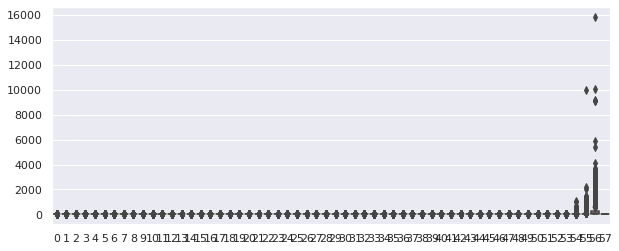

In [144]:
# Let's if dropping outliers will do this model any better.
# since last column is categorical, we convvert to object so that it is not considered
#
df.loc[:,57]  = df.loc[:,57].astype('object')
sns. boxplot(data = df)

In [145]:
# Dropping the outliers.
Q3=df.quantile(0.75)
Q1=df.quantile(0.25)
IQR = Q3 - Q1
# print(IQR)
# print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
dff= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
dff.shape


(114, 58)

Dropping outliers has drastically reduced the data, therefore dropping outliers is not a good approach